In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: NFLX
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


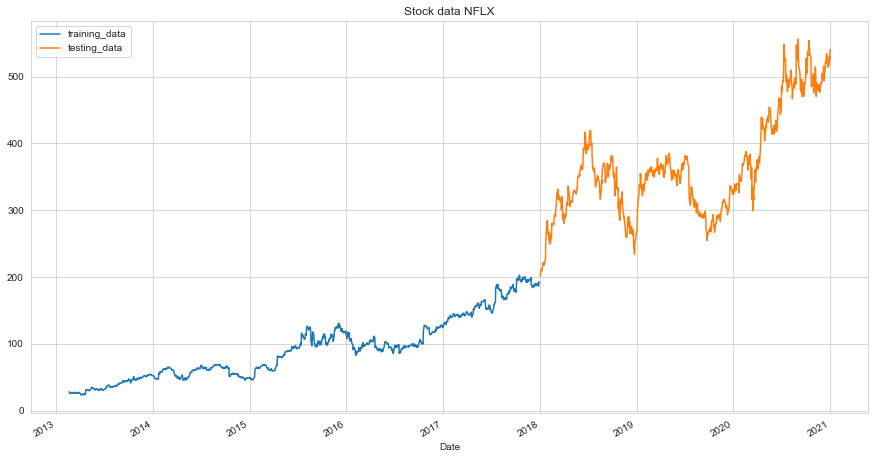

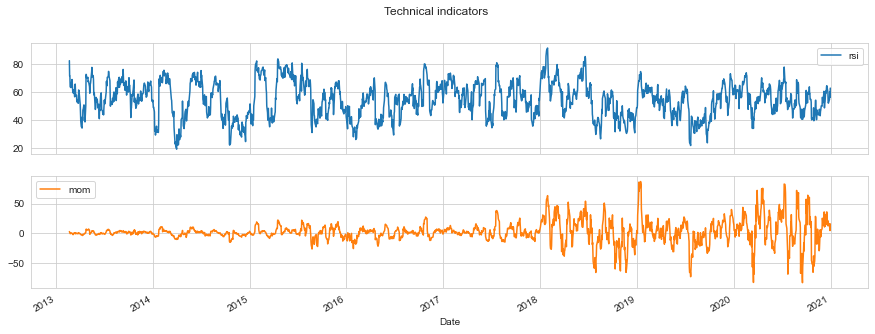

In [2]:
stock_name = 'nflx'.upper()
industry = 'Communication Services'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1935.08, duration: 0:00:00.240063
episode: 2/2000, episode end value: 2079.78, duration: 0:00:00.196044
episode: 3/2000, episode end value: 1938.66, duration: 0:00:00.174030
episode: 4/2000, episode end value: 1868.50, duration: 0:00:00.170040
episode: 5/2000, episode end value: 1951.55, duration: 0:00:00.180036
episode: 6/2000, episode end value: 1890.91, duration: 0:00:00.167038
episode: 7/2000, episode end value: 1922.06, duration: 0:00:00.196047
episode: 8/2000, episode end value: 1862.13, duration: 0:00:00.167036
episode: 9/2000, episode end value: 1970.87, duration: 0:00:00.178062
episode: 10/2000, episode end value: 1936.08, duration: 0:00:00.179038
episode: 11/2000, episode end value: 1953.51, duration: 0:00:00.185041
episode: 12/2000, episode end value: 2129.56, duration: 0:00:00.182025
episode: 13/2000, episode end value: 1986.26, duration: 0:00:00.185043
episode: 14/2000, episode end value: 1910.61, duration: 0:00:00.184042
episode: 15/200

episode: 117/2000, episode end value: 1904.44, duration: 0:00:00.230051
episode: 118/2000, episode end value: 1908.05, duration: 0:00:00.247055
episode: 119/2000, episode end value: 1899.17, duration: 0:00:00.227051
episode: 120/2000, episode end value: 1922.30, duration: 0:00:00.240053
episode: 121/2000, episode end value: 1928.26, duration: 0:00:00.263060
episode: 122/2000, episode end value: 1920.28, duration: 0:00:00.252053
episode: 123/2000, episode end value: 1931.70, duration: 0:00:00.264058
episode: 124/2000, episode end value: 1894.19, duration: 0:00:00.225050
episode: 125/2000, episode end value: 1925.55, duration: 0:00:00.216048
episode: 126/2000, episode end value: 1894.80, duration: 0:00:00.209065
episode: 127/2000, episode end value: 1891.29, duration: 0:00:00.196033
episode: 128/2000, episode end value: 1839.63, duration: 0:00:00.188044
episode: 129/2000, episode end value: 1874.34, duration: 0:00:00.186056
episode: 130/2000, episode end value: 1913.53, duration: 0:00:00

episode: 231/2000, episode end value: 1904.37, duration: 0:00:00.239048
episode: 232/2000, episode end value: 1930.39, duration: 0:00:00.254064
episode: 233/2000, episode end value: 1915.74, duration: 0:00:00.250068
episode: 234/2000, episode end value: 1906.74, duration: 0:00:00.266051
episode: 235/2000, episode end value: 1904.79, duration: 0:00:00.230067
episode: 236/2000, episode end value: 1910.66, duration: 0:00:00.238040
episode: 237/2000, episode end value: 1891.35, duration: 0:00:00.231068
episode: 238/2000, episode end value: 1914.45, duration: 0:00:00.197024
episode: 239/2000, episode end value: 1862.11, duration: 0:00:00.191043
episode: 240/2000, episode end value: 1896.01, duration: 0:00:00.177038
episode: 241/2000, episode end value: 1949.40, duration: 0:00:00.212049
episode: 242/2000, episode end value: 1895.39, duration: 0:00:00.206046
episode: 243/2000, episode end value: 1912.09, duration: 0:00:00.215047
episode: 244/2000, episode end value: 1847.00, duration: 0:00:00

episode: 346/2000, episode end value: 1880.70, duration: 0:00:00.201059
episode: 347/2000, episode end value: 1886.13, duration: 0:00:00.227050
episode: 348/2000, episode end value: 1912.69, duration: 0:00:00.267571
episode: 349/2000, episode end value: 1903.58, duration: 0:00:00.208064
episode: 350/2000, episode end value: 1911.35, duration: 0:00:00.187022
episode: 351/2000, episode end value: 1916.13, duration: 0:00:00.188044
episode: 352/2000, episode end value: 1916.11, duration: 0:00:00.216057
episode: 353/2000, episode end value: 1908.45, duration: 0:00:00.200028
episode: 354/2000, episode end value: 1856.38, duration: 0:00:00.187042
episode: 355/2000, episode end value: 1950.78, duration: 0:00:00.191044
episode: 356/2000, episode end value: 1864.66, duration: 0:00:00.216046
episode: 357/2000, episode end value: 1879.72, duration: 0:00:00.209708
episode: 358/2000, episode end value: 1886.42, duration: 0:00:00.199889
episode: 359/2000, episode end value: 1912.57, duration: 0:00:00

episode: 460/2000, episode end value: 1926.40, duration: 0:00:00.262059
episode: 461/2000, episode end value: 1928.78, duration: 0:00:00.233055
episode: 462/2000, episode end value: 1906.83, duration: 0:00:00.284061
episode: 463/2000, episode end value: 1885.89, duration: 0:00:00.261054
episode: 464/2000, episode end value: 1912.85, duration: 0:00:00.260057
episode: 465/2000, episode end value: 1887.95, duration: 0:00:00.258058
episode: 466/2000, episode end value: 1879.36, duration: 0:00:00.255056
episode: 467/2000, episode end value: 1867.97, duration: 0:00:00.297068
episode: 468/2000, episode end value: 1840.14, duration: 0:00:00.276061
episode: 469/2000, episode end value: 1920.37, duration: 0:00:00.282640
episode: 470/2000, episode end value: 1881.56, duration: 0:00:00.260095
episode: 471/2000, episode end value: 1926.56, duration: 0:00:00.209058
episode: 472/2000, episode end value: 1904.38, duration: 0:00:00.245087
episode: 473/2000, episode end value: 1945.06, duration: 0:00:00

episode: 574/2000, episode end value: 1920.30, duration: 0:00:00.257066
episode: 575/2000, episode end value: 1906.88, duration: 0:00:00.281066
episode: 576/2000, episode end value: 1910.94, duration: 0:00:00.288061
episode: 577/2000, episode end value: 1865.58, duration: 0:00:00.231053
episode: 578/2000, episode end value: 1852.46, duration: 0:00:00.205045
episode: 579/2000, episode end value: 1897.89, duration: 0:00:00.214047
episode: 580/2000, episode end value: 1859.52, duration: 0:00:00.227050
episode: 581/2000, episode end value: 1881.08, duration: 0:00:00.252074
episode: 582/2000, episode end value: 1912.89, duration: 0:00:00.244051
episode: 583/2000, episode end value: 1898.40, duration: 0:00:00.258059
episode: 584/2000, episode end value: 1916.64, duration: 0:00:00.281065
episode: 585/2000, episode end value: 1890.53, duration: 0:00:00.289065
episode: 586/2000, episode end value: 1903.03, duration: 0:00:00.225049
episode: 587/2000, episode end value: 1893.91, duration: 0:00:00

episode: 688/2000, episode end value: 1912.64, duration: 0:00:00.401090
episode: 689/2000, episode end value: 1942.13, duration: 0:00:00.323075
episode: 690/2000, episode end value: 1947.17, duration: 0:00:00.396087
episode: 691/2000, episode end value: 1922.90, duration: 0:00:00.324077
episode: 692/2000, episode end value: 1911.18, duration: 0:00:00.363077
episode: 693/2000, episode end value: 1881.17, duration: 0:00:00.381087
episode: 694/2000, episode end value: 1939.17, duration: 0:00:00.316071
episode: 695/2000, episode end value: 1915.25, duration: 0:00:00.349083
episode: 696/2000, episode end value: 1908.11, duration: 0:00:00.308068
episode: 697/2000, episode end value: 1919.76, duration: 0:00:00.313068
episode: 698/2000, episode end value: 1917.29, duration: 0:00:00.366085
episode: 699/2000, episode end value: 1910.21, duration: 0:00:00.289066
episode: 700/2000, episode end value: 1915.73, duration: 0:00:00.345073
episode: 701/2000, episode end value: 1931.52, duration: 0:00:00

episode: 802/2000, episode end value: 1855.75, duration: 0:00:00.304055
episode: 803/2000, episode end value: 1942.68, duration: 0:00:00.263053
episode: 804/2000, episode end value: 1914.20, duration: 0:00:00.291064
episode: 805/2000, episode end value: 1946.47, duration: 0:00:00.276064
episode: 806/2000, episode end value: 1936.65, duration: 0:00:00.258060
episode: 807/2000, episode end value: 1929.27, duration: 0:00:00.300063
episode: 808/2000, episode end value: 1917.14, duration: 0:00:00.280065
episode: 809/2000, episode end value: 1926.87, duration: 0:00:00.270060
episode: 810/2000, episode end value: 1907.84, duration: 0:00:00.316070
episode: 811/2000, episode end value: 1900.23, duration: 0:00:00.278064
episode: 812/2000, episode end value: 1909.26, duration: 0:00:00.306073
episode: 813/2000, episode end value: 1839.70, duration: 0:00:00.280062
episode: 814/2000, episode end value: 1856.11, duration: 0:00:00.262058
episode: 815/2000, episode end value: 1907.23, duration: 0:00:00

episode: 916/2000, episode end value: 1896.38, duration: 0:00:00.332069
episode: 917/2000, episode end value: 1884.61, duration: 0:00:00.292067
episode: 918/2000, episode end value: 1887.10, duration: 0:00:00.258056
episode: 919/2000, episode end value: 1885.78, duration: 0:00:00.281061
episode: 920/2000, episode end value: 1869.54, duration: 0:00:00.335081
episode: 921/2000, episode end value: 1885.99, duration: 0:00:00.305063
episode: 922/2000, episode end value: 1922.05, duration: 0:00:00.273063
episode: 923/2000, episode end value: 1922.06, duration: 0:00:00.322071
episode: 924/2000, episode end value: 1936.75, duration: 0:00:00.284067
episode: 925/2000, episode end value: 1931.37, duration: 0:00:00.328070
episode: 926/2000, episode end value: 1902.30, duration: 0:00:00.272060
episode: 927/2000, episode end value: 1906.82, duration: 0:00:00.258057
episode: 928/2000, episode end value: 1895.30, duration: 0:00:00.254065
episode: 929/2000, episode end value: 1879.68, duration: 0:00:00

episode: 1030/2000, episode end value: 1927.04, duration: 0:00:00.363077
episode: 1031/2000, episode end value: 1912.17, duration: 0:00:00.435097
episode: 1032/2000, episode end value: 1920.76, duration: 0:00:00.418096
episode: 1033/2000, episode end value: 1891.10, duration: 0:00:00.317067
episode: 1034/2000, episode end value: 1910.64, duration: 0:00:00.359095
episode: 1035/2000, episode end value: 1926.03, duration: 0:00:00.468604
episode: 1036/2000, episode end value: 1949.84, duration: 0:00:00.386088
episode: 1037/2000, episode end value: 1930.38, duration: 0:00:00.461105
episode: 1038/2000, episode end value: 1923.96, duration: 0:00:00.502114
episode: 1039/2000, episode end value: 1907.27, duration: 0:00:00.499860
episode: 1040/2000, episode end value: 1895.50, duration: 0:00:00.492915
episode: 1041/2000, episode end value: 1912.60, duration: 0:00:00.448106
episode: 1042/2000, episode end value: 1893.99, duration: 0:00:00.419095
episode: 1043/2000, episode end value: 1887.15, dur

episode: 1143/2000, episode end value: 1872.48, duration: 0:00:00.384089
episode: 1144/2000, episode end value: 1920.30, duration: 0:00:00.409097
episode: 1145/2000, episode end value: 1915.20, duration: 0:00:00.378636
episode: 1146/2000, episode end value: 1883.85, duration: 0:00:00.312425
episode: 1147/2000, episode end value: 1858.33, duration: 0:00:00.292063
episode: 1148/2000, episode end value: 1966.35, duration: 0:00:00.312074
episode: 1149/2000, episode end value: 1921.53, duration: 0:00:00.302063
episode: 1150/2000, episode end value: 1916.68, duration: 0:00:00.382086
episode: 1151/2000, episode end value: 1923.31, duration: 0:00:00.309075
episode: 1152/2000, episode end value: 1907.23, duration: 0:00:00.317069
episode: 1153/2000, episode end value: 1932.15, duration: 0:00:00.295065
episode: 1154/2000, episode end value: 1909.65, duration: 0:00:00.261066
episode: 1155/2000, episode end value: 1914.02, duration: 0:00:00.299065
episode: 1156/2000, episode end value: 2013.10, dur

episode: 1256/2000, episode end value: 1892.70, duration: 0:00:00.315071
episode: 1257/2000, episode end value: 1891.27, duration: 0:00:00.324069
episode: 1258/2000, episode end value: 1908.98, duration: 0:00:00.350079
episode: 1259/2000, episode end value: 1911.76, duration: 0:00:00.300069
episode: 1260/2000, episode end value: 1932.68, duration: 0:00:00.316071
episode: 1261/2000, episode end value: 1890.20, duration: 0:00:00.294064
episode: 1262/2000, episode end value: 1887.68, duration: 0:00:00.286065
episode: 1263/2000, episode end value: 1909.91, duration: 0:00:00.311070
episode: 1264/2000, episode end value: 1891.30, duration: 0:00:00.366086
episode: 1265/2000, episode end value: 1930.27, duration: 0:00:00.313068
episode: 1266/2000, episode end value: 1883.25, duration: 0:00:00.357082
episode: 1267/2000, episode end value: 1888.51, duration: 0:00:00.438103
episode: 1268/2000, episode end value: 1870.93, duration: 0:00:00.371083
episode: 1269/2000, episode end value: 1883.70, dur

episode: 1369/2000, episode end value: 1899.26, duration: 0:00:00.380081
episode: 1370/2000, episode end value: 1912.72, duration: 0:00:00.491111
episode: 1371/2000, episode end value: 1908.19, duration: 0:00:00.378089
episode: 1372/2000, episode end value: 1920.57, duration: 0:00:00.443097
episode: 1373/2000, episode end value: 1904.12, duration: 0:00:00.381090
episode: 1374/2000, episode end value: 1921.04, duration: 0:00:00.409084
episode: 1375/2000, episode end value: 1906.52, duration: 0:00:00.468213
episode: 1376/2000, episode end value: 1911.13, duration: 0:00:00.547118
episode: 1377/2000, episode end value: 1955.59, duration: 0:00:00.563847
episode: 1378/2000, episode end value: 1919.91, duration: 0:00:00.452099
episode: 1379/2000, episode end value: 1898.98, duration: 0:00:00.500111
episode: 1380/2000, episode end value: 1895.93, duration: 0:00:00.440099
episode: 1381/2000, episode end value: 1896.15, duration: 0:00:00.347600
episode: 1382/2000, episode end value: 1896.14, dur

episode: 1482/2000, episode end value: 1903.26, duration: 0:00:00.427097
episode: 1483/2000, episode end value: 1890.76, duration: 0:00:00.303064
episode: 1484/2000, episode end value: 1912.45, duration: 0:00:00.230940
episode: 1485/2000, episode end value: 1939.66, duration: 0:00:00.274520
episode: 1486/2000, episode end value: 1907.94, duration: 0:00:00.255056
episode: 1487/2000, episode end value: 1902.91, duration: 0:00:00.305071
episode: 1488/2000, episode end value: 1886.78, duration: 0:00:00.263061
episode: 1489/2000, episode end value: 1925.68, duration: 0:00:00.249049
episode: 1490/2000, episode end value: 1925.15, duration: 0:00:00.234057
episode: 1491/2000, episode end value: 1907.62, duration: 0:00:00.286064
episode: 1492/2000, episode end value: 1873.03, duration: 0:00:00.294065
episode: 1493/2000, episode end value: 1882.46, duration: 0:00:00.296068
episode: 1494/2000, episode end value: 1874.56, duration: 0:00:00.242053
episode: 1495/2000, episode end value: 1883.43, dur

episode: 1595/2000, episode end value: 1844.01, duration: 0:00:00.247055
episode: 1596/2000, episode end value: 1869.01, duration: 0:00:00.261057
episode: 1597/2000, episode end value: 1843.07, duration: 0:00:00.306067
episode: 1598/2000, episode end value: 1856.86, duration: 0:00:00.287062
episode: 1599/2000, episode end value: 1838.26, duration: 0:00:00.278060
episode: 1600/2000, episode end value: 1878.71, duration: 0:00:00.254061
episode: 1601/2000, episode end value: 1865.50, duration: 0:00:00.296068
episode: 1602/2000, episode end value: 1836.78, duration: 0:00:00.303072
episode: 1603/2000, episode end value: 1880.71, duration: 0:00:00.351081
episode: 1604/2000, episode end value: 1856.06, duration: 0:00:00.379084
episode: 1605/2000, episode end value: 1943.00, duration: 0:00:00.358079
episode: 1606/2000, episode end value: 1890.35, duration: 0:00:00.343077
episode: 1607/2000, episode end value: 1884.48, duration: 0:00:00.335080
episode: 1608/2000, episode end value: 1883.75, dur

episode: 1708/2000, episode end value: 1910.33, duration: 0:00:00.260061
episode: 1709/2000, episode end value: 1886.42, duration: 0:00:00.266060
episode: 1710/2000, episode end value: 1836.25, duration: 0:00:00.281060
episode: 1711/2000, episode end value: 1876.08, duration: 0:00:00.273060
episode: 1712/2000, episode end value: 1889.49, duration: 0:00:00.282064
episode: 1713/2000, episode end value: 1887.65, duration: 0:00:00.287066
episode: 1714/2000, episode end value: 1896.95, duration: 0:00:00.260055
episode: 1715/2000, episode end value: 1876.81, duration: 0:00:00.247056
episode: 1716/2000, episode end value: 1888.27, duration: 0:00:00.292069
episode: 1717/2000, episode end value: 1881.42, duration: 0:00:00.237052
episode: 1718/2000, episode end value: 1873.05, duration: 0:00:00.397086
episode: 1719/2000, episode end value: 1906.28, duration: 0:00:00.298076
episode: 1720/2000, episode end value: 1907.29, duration: 0:00:00.286069
episode: 1721/2000, episode end value: 1925.53, dur

episode: 1821/2000, episode end value: 1878.94, duration: 0:00:00.507114
episode: 1822/2000, episode end value: 1924.12, duration: 0:00:00.428095
episode: 1823/2000, episode end value: 1904.04, duration: 0:00:00.318070
episode: 1824/2000, episode end value: 1892.52, duration: 0:00:00.338073
episode: 1825/2000, episode end value: 1885.81, duration: 0:00:00.349078
episode: 1826/2000, episode end value: 1900.15, duration: 0:00:00.298068
episode: 1827/2000, episode end value: 1822.12, duration: 0:00:00.262060
episode: 1828/2000, episode end value: 1847.64, duration: 0:00:00.262059
episode: 1829/2000, episode end value: 1890.59, duration: 0:00:00.301068
episode: 1830/2000, episode end value: 1909.38, duration: 0:00:00.282063
episode: 1831/2000, episode end value: 1950.85, duration: 0:00:00.258057
episode: 1832/2000, episode end value: 1916.91, duration: 0:00:00.257057
episode: 1833/2000, episode end value: 1898.14, duration: 0:00:00.267057
episode: 1834/2000, episode end value: 1883.46, dur

episode: 1934/2000, episode end value: 1909.85, duration: 0:00:00.255056
episode: 1935/2000, episode end value: 1886.56, duration: 0:00:00.331078
episode: 1936/2000, episode end value: 1890.15, duration: 0:00:00.286060
episode: 1937/2000, episode end value: 1874.34, duration: 0:00:00.349078
episode: 1938/2000, episode end value: 1927.68, duration: 0:00:00.344079
episode: 1939/2000, episode end value: 1962.49, duration: 0:00:00.334076
episode: 1940/2000, episode end value: 1957.77, duration: 0:00:00.322072
episode: 1941/2000, episode end value: 1889.73, duration: 0:00:00.346077
episode: 1942/2000, episode end value: 1912.37, duration: 0:00:00.308068
episode: 1943/2000, episode end value: 1930.48, duration: 0:00:00.273059
episode: 1944/2000, episode end value: 1918.34, duration: 0:00:00.308068
episode: 1945/2000, episode end value: 1851.13, duration: 0:00:00.247056
episode: 1946/2000, episode end value: 1902.88, duration: 0:00:00.291067
episode: 1947/2000, episode end value: 1920.04, dur

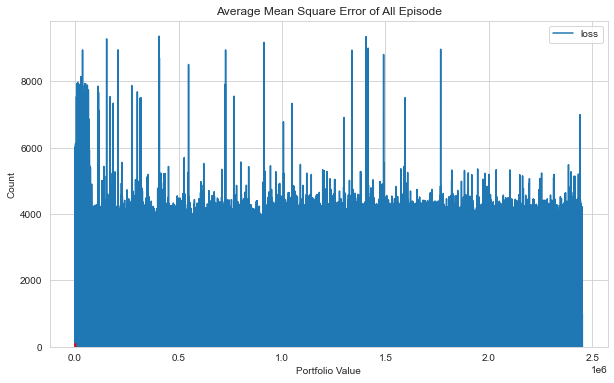

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

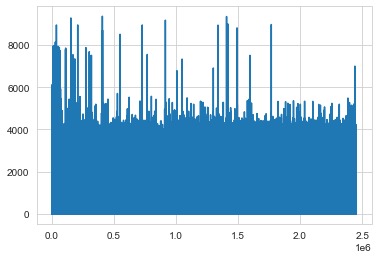

In [5]:
plt.plot(agent.model.losses)

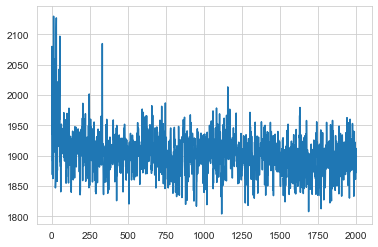

In [6]:
plt.plot(portfolio_value)

episode end value: 1636.63, duration: 0:00:00.157036
Sell: 389 times, Buy: 365 times


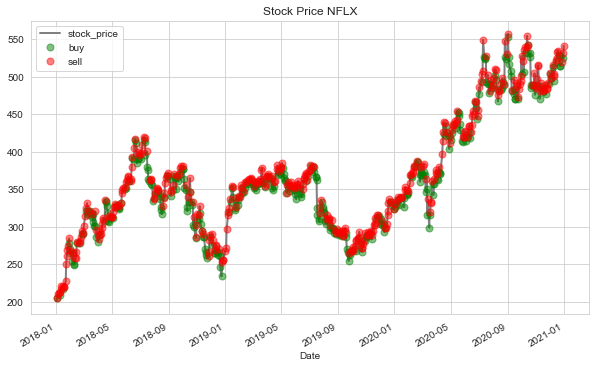

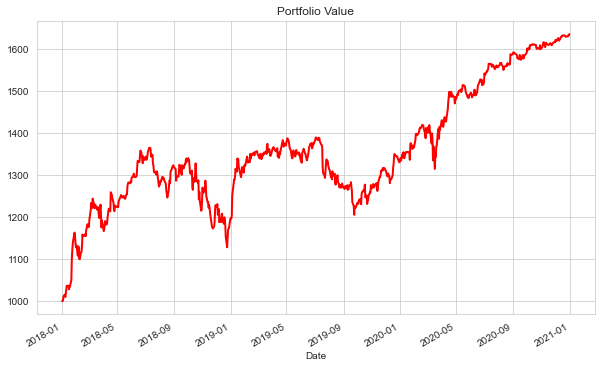

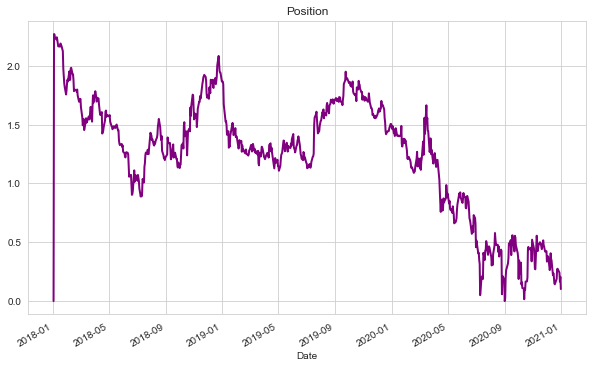

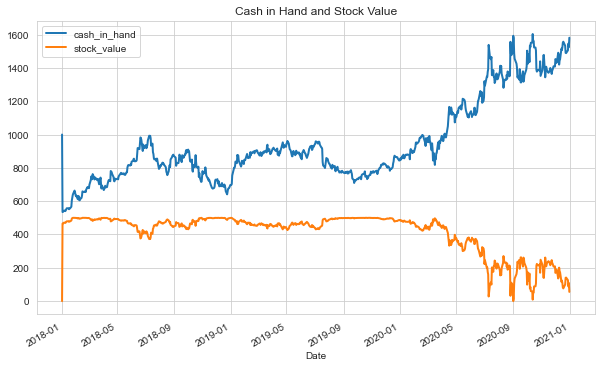

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: NFLX
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: 17.85 %
Volatility: 0.1442
shape ratio: 1.1612
Maximun drawdown: -17.37 %
Calmar ratio: 1.0274
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): 39.06 %
Volatility (benchmark): 0.4268
shape ratio: 0.8896
Maximun drawdown: -44.18 %
Calmar ratio (benchmark): 0.8842


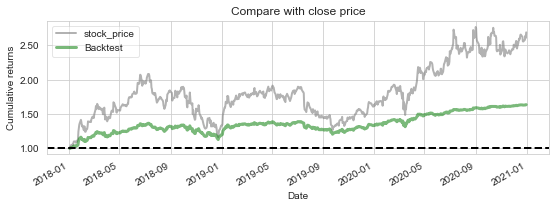

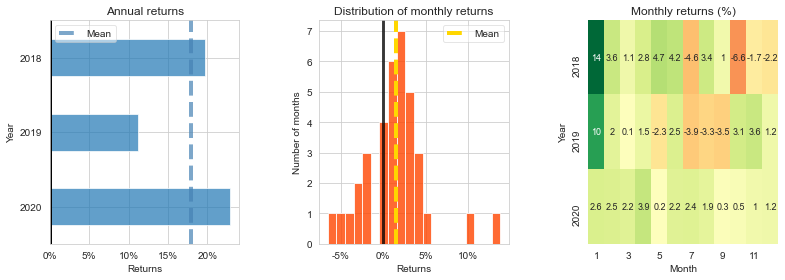

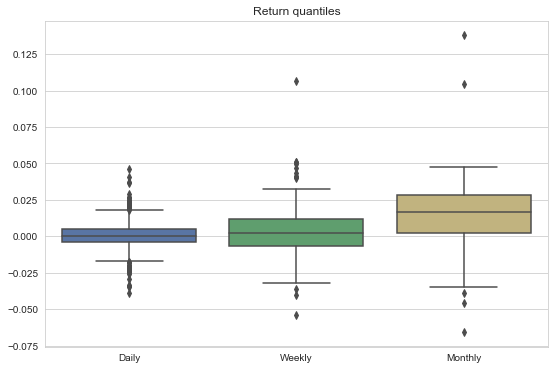

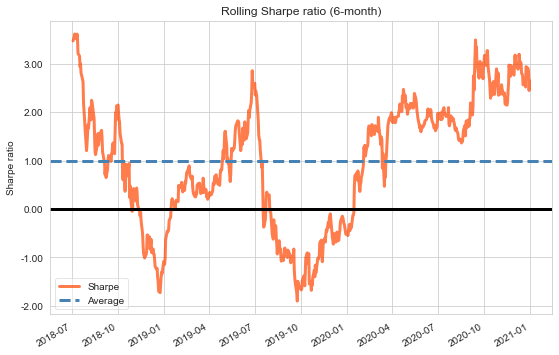

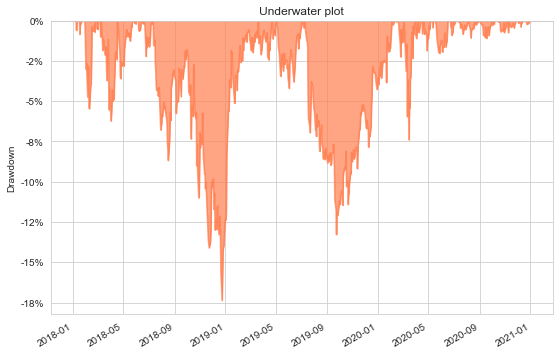

In [9]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')